# Data ingestion & inspection
In this chapter, you will be introduced to Panda's DataFrames. You will use Pandas to import and inspect a variety of datasets, ranging from population data obtained from The World Bank to monthly stock data obtained via Yahoo! Finance. You will also practice building DataFrames from scratch, and become familiar with Pandas' intrinsic data visualization capabilities.

# 1. Review of pandas DataFrames
## NumPy and pandas working together
Pandas depends upon and interoperates with NumPy, the Python library for fast numeric array computations. For example, you can use the DataFrame attribute `.values` to represent a DataFrame `df` as a NumPy array. You can also pass pandas data structures to NumPy methods. In this exercise, we have imported pandas as `pd` and loaded world population data every 10 years since 1960 into the DataFrame `df`. This dataset was derived from the one used in the previous exercise.

Your job is to extract the values and store them in an array using the attribute `.values`. You'll then use those values as input into the NumPy `np.log10()` method to compute the base 10 logarithm of the population values. Finally, you will pass the entire pandas DataFrame into the same NumPy `np.log10()` method and compare the results.

### Instructions:
* Import `numpy` using the standard alias `np`.
* Assign the numerical values in the DataFrame `df` to an array `np_vals` using the attribute `values`.
* Pass `np_vals` into the NumPy method `log10()` and store the results in `np_vals_log10`.
* Pass the entire `df` DataFrame into the NumPy method `log10()` and store the results in `df_log10`.
* Inspect the output of the `print()` code to see the `type()` of the variables that you created.

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

df = pd.read_csv('_datasets/world_population.csv', index_col='Year')

# Create array of DataFrame values: np_vals
np_vals = df.values;

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']];

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


# 2. Building DataFrames from scratch
## 2.1 Zip lists to build a DataFrame
In this exercise, you're going to make a pandas DataFrame of the top three countries to win gold medals since 1896 by first building a dictionary. `list_keys` contains the column names `'Country'` and `'Total'`. `list_values` contains the full names of each country and the number of gold medals awarded. The values have been taken from [Wikipedia](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table).

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the `list()`, `zip()`, `dict()` and `pd.DataFrame()` functions. Pandas has already been imported as `pd`.

_Note_: The `zip()` function in Python 3 and above returns a special `zip` object, which is essentially a generator. To convert this zip object into a list, you'll need to use `list()`. 

### Instructions:
* Zip the 2 lists `list_keys` and `list_values` together into one list of (key, value) tuples. Be sure to convert the `zip` object into a list, and store the result in `zipped`.
* Inspect the contents of `zipped` using `print()`. This has been done for you.
* Construct a dictionary using `zipped`. Store the result as `data`.
* Construct a DataFrame using the dictionary. Store the result as `df`.

In [2]:
# Data lists
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)
print(50*'*')

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)


[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
**************************************************
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


## 2.2 Labeling your data
You can use the DataFrame attribute `df.columns` to view and assign new string labels to columns in a pandas DataFrame.

In this exercise, we have imported pandas as `pd` and defined a DataFrame `df` containing top Billboard hits from the 1980s (from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_1980s#1980)). Each row has the year, artist, song name and the number of weeks at the top. However, this DataFrame has the column labels `a, b, c, d`. Your job is to use the `df.columns` attribute to re-assign descriptive column labels.

### Instructions:
* Create a list of new column labels with `'year'`, `'artist'`, `'song'`, `'chart weeks'`, and assign it to `list_labels`.
* Assign your list of labels to `df.columns`.

In [3]:
# Create DataFrame for exercise 
list_key = ['first_col', 'second_col', 'third_col', 'fourth_col']
list_values = [[1980, 1981, 1982], 
               ['Blondie', 'Chistorpher Cross', 'Joan Jett'], 
               ['Call Me', 'Arthurs Theme', 'I Love Rock and Roll'], 
               [6, 3, 7]]

zipped = list(zip(list_key, list_values))
data = dict(zipped)
df = pd.DataFrame(data)

print(df)

   first_col         second_col             third_col  fourth_col
0       1980            Blondie               Call Me           6
1       1981  Chistorpher Cross         Arthurs Theme           3
2       1982          Joan Jett  I Love Rock and Roll           7


In [4]:
# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels

print(df)

   year             artist                  song  chart weeks
0  1980            Blondie               Call Me            6
1  1981  Chistorpher Cross         Arthurs Theme            3
2  1982          Joan Jett  I Love Rock and Roll            7


## 2.3 Building DataFrames with broadcasting
You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. We have imported the names of 15 cities as the list `cities`.

Your job is to construct a DataFrame from the list of cities and the string `'PA'`.

### Instructions:
* Make a string object with the value `'PA'` and assign it to `state`.
* Construct a dictionary with 2 key:value pairs: `'state':state` and `'city':cities`.
* Construct a pandas DataFrame from the dictionary you created and assign it to `df`.

In [5]:
# List of cities
cities = ['Manheim', 'Preston park', 'Biglerville', 'Indiana', 'Curwensville', 'Crown', 'Harveys lake', 'Mineral springs', 
          'Cassville', 'Hannastown', 'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state':state, 'city':cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


# 3. Importing & exporting data
## 3.1 Reading a flat file
Your job is to read the World Bank population data you saw earlier into a DataFrame using `read_csv()`. The file is available in the variable `data_file`.

The next step is to reread the same file, but simultaneously rename the columns using the `names` keyword input parameter, set equal to a list of new column labels. You will also need to set `header=0` to rename the column labels.

Finish up by inspecting the result with `df.head()` and `df.info()` in the IPython Shell (changing `df` to the name of your DataFrame variable).

### Instructions:
* Use `pd.read_csv()` with the string `data_file` to read the CSV file into a DataFrame and assign it to `df1`.
* Create a list of new column labels - `'year'`, `'population'` - and assign it to the variable `new_labels`.
* Reread the same file, again using `pd.read_csv()`, but this time, add the keyword arguments `header=0` and `names=new_labels`. Assign the resulting DataFrame to `df2`.
* Print both the `df1` and `df2` DataFrames to see the change in column names. This has already been done for you.

In [6]:
# Read in the file: df1
df1 = pd.read_csv('_datasets/world_population.csv')

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv('_datasets/world_population.csv', header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(30*'*')
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
******************************
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


## 3.2 Delimiters, headers, and extensions
Not all data files are clean and tidy. Pandas provides methods for reading those not-so-perfect data files that you encounter far too often.

In this exercise, you have monthly stock data for four companies downloaded from [Yahoo Finance](https://finance.yahoo.com/). The data is stored as one row for each company and each column is the end-of-month closing price. The file name is given to you in the variable `file_messy`.

In addition, this file has three aspects that may cause trouble for lesser tools: multiple header lines, comment records (rows) interleaved throughout the data rows, and space delimiters instead of commas.

Your job is to use pandas to read the data from this problematic `file_messy` using non-default input options with `read_csv()` so as to tidy up the mess at read time. Then, write the cleaned up data to a CSV file with the variable `file_clean` that has been prepared for you, as you might do in a real data workflow.

You can learn about the option input parameters needed by using `help()` on the pandas function `pd.read_csv()`.

### Instructions:
* Use `pd.read_csv()` _without using any keyword arguments_ to read `file_messy` into a pandas DataFrame `df1`.
* Use `.head()` to print the first 5 rows of `df1` and see how messy it is. 
* Using the keyword arguments `delimiter=' '`, `header=3` and `comment='#'`, use `pd.read_csv()` again to read `file_messy` into a new DataFrame `df2`.
* Print the output of `df2.head()` to verify the file was read correctly.
* Use the DataFrame method `.to_csv()` to save the DataFrame `df2` to the variable `file_clean`. Be sure to specify `index=False`.
* Use the DataFrame method `.to_excel()` to save the DataFrame `df2` to the file `'file_clean.xlsx'`. Again, remember to specify `index=False`.

In [7]:
file_messy = '_datasets/messy_stock_data.tsv.txt'

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head())
print(50*'*')

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

# # Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv('file_clean.csv', index=False)

# # Save the cleaned up DataFrame to an excel file without the index
# df2.to_excel('file_clean.xlsx', index=False)

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        
**************************************************
     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.08   42.13   43.

# 4. Plotting with pandas
## 4.1 Plotting series using pandas
Data visualization is often a very effective first step in gaining a rough understanding of a data set to be analyzed. Pandas provides data visualization by both depending upon and interoperating with the matplotlib library. You will now explore some of the basic plotting mechanics with pandas as well as related matplotlib options. We have pre-loaded a pandas DataFrame `df` which contains the data you need. Your job is to use the DataFrame method `df.plot()` to visualize the data, and then explore the optional matplotlib input parameters that this `.plot()` method accepts.

The pandas `.plot()` method makes calls to matplotlib to construct the plots. This means that you can use the skills you've learned in previous visualization courses to customize the plot. In this exercise, you'll add a custom title and axis labels to the figure.

Before plotting, inspect the DataFrame in the IPython Shell using `df.head()`. Also, use `type(df)` and note that it is a single column DataFrame.

### Instructions:
* Create the plot with the DataFrame method `df.plot()`. Specify a `color` of `'red'`.
    * _Note_: `c` and `color` are interchangeable as parameters here, but we ask you to be explicit and specify `color`.
* Use `plt.title()` to give the plot a title of `'Temperature in Austin'`.
* Use `plt.xlabel()` to give the plot an x-axis label of `'Hours since midnight August 1, 2010'`.
* Use `plt.ylabel()` to give the plot a y-axis label of `'Temperature (degrees F)'`.
* Finally, display the plot using `plt.show()`.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('_datasets/weather_data_austin_2010.csv')
df_T = df['Temperature'].loc[0:743]

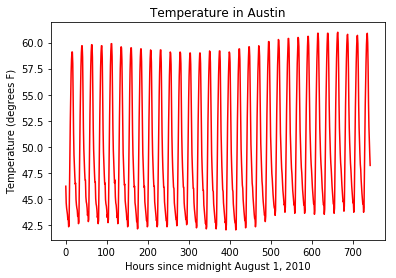

In [9]:
# Create a plot with color='red'
df_T.plot(color='red')

# Add a title
plt.title('Temperature in Austin')
# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')
# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')
# Display the plot
plt.show()

## 4.2 Plotting DataFrames
Comparing data from several columns can be very illuminating. Pandas makes doing so easy with multi-column DataFrames. By default, calling `df.plot()` will cause pandas to over-plot all column data, with each column as a single line. In this exercise, we have pre-loaded three columns of data from a weather data set - temperature, dew point, and pressure - but the problem is that pressure has different units of measure. The pressure data, measured in Atmospheres, has a different vertical scaling than that of the other two data columns, which are both measured in degrees Fahrenheit.

Your job is to plot all columns as a multi-line plot, to see the nature of vertical scaling problem. Then, use a list of column names passed into the DataFrame `df[column_list]` to limit plotting to just one column, and then just 2 columns of data. When you are finished, you will have created 4 plots. You can cycle through them by clicking on the 'Previous Plot' and 'Next Plot' buttons.

As in the previous exercise, inspect the DataFrame `df` in the IPython Shell using the `.head()` and `.info()` methods.

### Instructions:
* Plot all columns together on one figure by calling `df.plot()`, and noting the vertical scaling problem.
* Plot all columns as subplots. To do so, you need to specify `subplots=True` inside `.plot()`.
* Plot a single column of dew point data. To do this, define a column list containing a single column name `'Dew Point (deg F)'`, and call `df[column_list1].plot()`.
* Plot two columns of data, `'Temperature (deg F)'` and `'Dew Point (deg F)'`. To do this, define a list containing those column names and pass it into `df[]`, as `df[column_list2].plot()`.

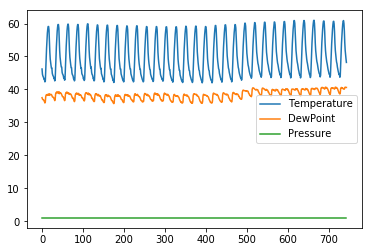

In [10]:
df = df.loc[0:743]

# Plot all columns (default)
df.plot()
plt.show()

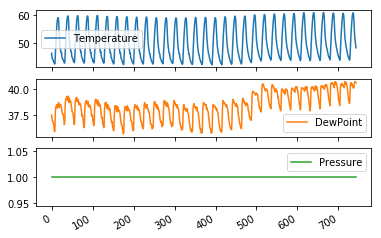

In [11]:
# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

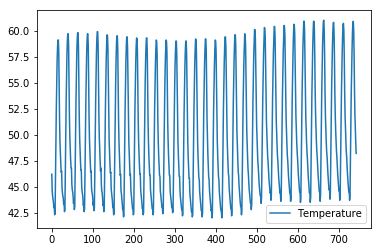

In [12]:
# Plot just the Dew Point data
column_list1 = ['Temperature']
df[column_list1].plot()
plt.show()

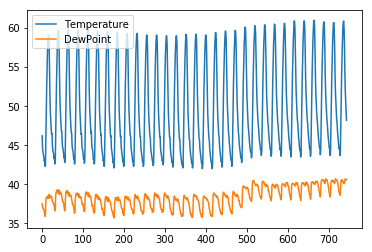

In [13]:
# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature', 'DewPoint']
df[column_list2].plot()
plt.show()